# Strategic Loan Insights & Risk Monitoring

In [1]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Importing data
df = pd.read_csv("C:/Users/DELL'/Music/project- loan/financial_loan.csv") 
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y')

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2024-02-11,13-09-2024,13-04-2024,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2024-01-01,14-12-2024,15-01-2024,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2024-01-05,12-12-2024,09-01-2024,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2024-02-25,12-12-2024,12-03-2024,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2024-01-01,14-12-2024,15-01-2024,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
# Creating Month and Year columns
df['Month'] = df['issue_date'].dt.month
df['MonthName'] = df['issue_date'].dt.strftime('%b')
df['Year'] = df['issue_date'].dt.year


### KPI Calculations

#### 1. Total Loan Applications

In [8]:
total_applications = len(df)
print("Total Loan Applications:", total_applications)



Total Loan Applications: 38576


#### 2.MTD Loan Applications

In [9]:
mtd_applications = len(df[df['issue_date'].dt.month == 12])
print("MTD Loan Applications (Dec):", mtd_applications)


MTD Loan Applications (Dec): 4314


#### 3.PMTD Loan Applications

In [10]:
pmtd_applications = len(df[df['issue_date'].dt.month == 11])
print("PMTD Loan Applications (Nov):", pmtd_applications)


PMTD Loan Applications (Nov): 4035


#### 4. Total Funded Amount

In [11]:
total_funded_amount = df['loan_amount'].sum()
print("Total Funded Amount:", total_funded_amount)


Total Funded Amount: 435757075


#### 5. MTD Total Funded Amount

In [12]:
mtd_funded_amount = df[df['issue_date'].dt.month == 12]['loan_amount'].sum()
print("MTD Funded Amount (Dec):", mtd_funded_amount)


MTD Funded Amount (Dec): 53981425


#### 6. PMTD Total Funded Amount

In [13]:
pmtd_funded_amount = df[df['issue_date'].dt.month == 11]['loan_amount'].sum()
print("PMTD Funded Amount (Nov):", pmtd_funded_amount)


PMTD Funded Amount (Nov): 47754825


#### 7. Total Amount Received

In [14]:
total_amount_received = df['total_payment'].sum()
print("Total Amount Received:", total_amount_received)


Total Amount Received: 473071176


#### 8. MTD Total Amount Received

In [15]:
mtd_amount_received = df[df['issue_date'].dt.month == 12]['total_payment'].sum()
print("MTD Amount Received (Dec):", mtd_amount_received)


MTD Amount Received (Dec): 58074440


#### 9. PMTD Total Amount Received

In [16]:
pmtd_amount_received = df[df['issue_date'].dt.month == 11]['total_payment'].sum()
print("PMTD Amount Received (Nov):", pmtd_amount_received)


PMTD Amount Received (Nov): 50132030


#### 10. Average Interest Rate

In [66]:
avg_interest_rate = round(df['int_rate'].mean() * 100, 2)
print("Average Interest Rate (%):", avg_interest_rate)

Average Interest Rate (%): 12.05


#### 11. MTD Average Interest

In [19]:
mtd_avg_interest_rate = round(df[df['issue_date'].dt.month == 12]['int_rate'].mean() * 100, 2)
print("MTD Average Interest Rate (Dec) (%):", mtd_avg_interest_rate)


MTD Average Interest Rate (Dec) (%): 12.36


#### 12. PMTD Average Interest

In [20]:
mtd_avg_interest_rate = round(df[df['issue_date'].dt.month == 11]['int_rate'].mean() * 100, 2)
print("PMTD Average Interest Rate (Nov) (%):", pmtd_avg_interest_rate)


PMTD Average Interest Rate (Nov) (%): 11.94


#### 13. Avg DTI

In [22]:
avg_dti = round(df['dti'].mean() * 100, 2)
print("Average DTI (%):", avg_dti)


Average DTI (%): 13.33


####  14. MTD Avg DTI

In [25]:
mtd_avg_dti = round(df[df['issue_date'].dt.month == 12]['dti'].mean() * 100, 2)
print("MTD Average DTI (Dec) (%):", mtd_avg_dti)


MTD Average DTI (Dec) (%): 13.67


####  15. PMTD Avg DTI

In [26]:
pmtd_avg_dti = round(df[df['issue_date'].dt.month == 11]['dti'].mean() * 100, 2)
print("PMTD Average DTI (Nov) (%):", pmtd_avg_dti)


PMTD Average DTI (Nov) (%): 13.3


###   GOOD LOAN ISSUED

#### 16. Good Loan Percentage

In [28]:
good_loans = df[df['loan_status'].isin(['Fully Paid', 'Current'])]
good_loan_percentage = round(len(good_loans) * 100.0 / len(df), 2)
print("Good Loan Percentage (%):", good_loan_percentage)


Good Loan Percentage (%): 86.18


#### 17. Good Loan Applications

In [29]:
good_loan_applications = len(good_loans)
print("Good Loan Applications:", good_loan_applications)


Good Loan Applications: 33243


#### 18. Good Loan Funded Amount

In [30]:
good_loan_funded = good_loans['loan_amount'].sum()
print("Good Loan Funded Amount:", good_loan_funded)


Good Loan Funded Amount: 370224850


#### 19. Good Loan Amount Received

In [31]:
good_loan_received = good_loans['total_payment'].sum()
print("Good Loan Amount Received:", good_loan_received)


Good Loan Amount Received: 435786413


###  BAD LOAN ISSUED

####  20. Bad Loan Percentage

In [32]:
bad_loans = df[df['loan_status'] == 'Charged Off']
bad_loan_percentage = round(len(bad_loans) * 100.0 / len(df), 2)
print("Bad Loan Percentage (%):", bad_loan_percentage)


Bad Loan Percentage (%): 13.82


#### 21. Bad Loan Applications

In [33]:
bad_loan_applications = len(bad_loans)
print("Bad Loan Applications:", bad_loan_applications)


Bad Loan Applications: 5333


#### 22. Bad Loan Funded Amount

In [34]:
bad_loan_funded = bad_loans['loan_amount'].sum()
print("Bad Loan Funded Amount:", bad_loan_funded)


Bad Loan Funded Amount: 65532225


####  23. Bad Loan Amount Received

In [35]:
bad_loan_received = bad_loans['total_payment'].sum()
print("Bad Loan Amount Received:", bad_loan_received)


Bad Loan Amount Received: 37284763


 ###  LOAN STATUS OVERVIEW

#### 24. Loan Status Summary


In [36]:
loan_status_summary = df.groupby('loan_status').agg(
    LoanCount=('id', 'count'),
    Total_Amount_Received=('total_payment', 'sum'),
    Total_Funded_Amount=('loan_amount', 'sum'),
    Interest_Rate=('int_rate', lambda x: round(x.mean() * 100, 2)),
    DTI=('dti', lambda x: round(x.mean() * 100, 2))
).reset_index()

print(" Loan Status Summary:\n", loan_status_summary)


 Loan Status Summary:
    loan_status  LoanCount  Total_Amount_Received  Total_Funded_Amount  \
0  Charged Off       5333               37284763             65532225   
1      Current       1098               24199914             18866500   
2   Fully Paid      32145              411586499            351358350   

   Interest_Rate    DTI  
0          13.88  14.00  
1          15.10  14.72  
2          11.64  13.17  


#### 25. MTD Loan Status Summary

In [37]:
mtd_df = df[df['issue_date'].dt.month == 12]

mtd_loan_status_summary = mtd_df.groupby('loan_status').agg(
    MTD_Total_Amount_Received=('total_payment', 'sum'),
    MTD_Total_Funded_Amount=('loan_amount', 'sum')
).reset_index()

print("MTD Loan Status Summary (Dec):\n", mtd_loan_status_summary)


MTD Loan Status Summary (Dec):
    loan_status  MTD_Total_Amount_Received  MTD_Total_Funded_Amount
0  Charged Off                    5324211                  8732775
1      Current                    4934318                  3946625
2   Fully Paid                   47815911                 41302025


#### Good vs Bad Loan

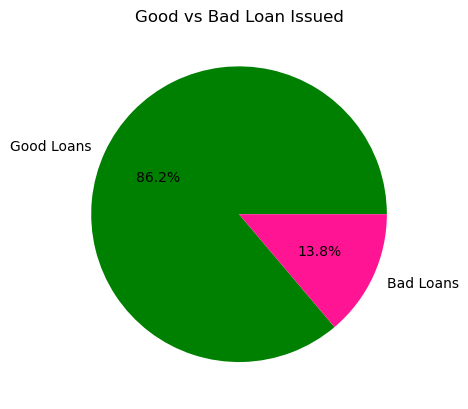

In [39]:
good = df[df['loan_status'].isin(['Fully Paid', 'Current'])].shape[0]
bad = df[df['loan_status'] == 'Charged Off'].shape[0]

plt.pie([good, bad], labels=['Good Loans', 'Bad Loans'], autopct='%1.1f%%', colors=['green', 'deeppink'])
plt.title("Good vs Bad Loan Issued")
plt.show()

### BANK LOAN REPORT | OVERVIEW

#### 3. Total Funded Amount by Month 

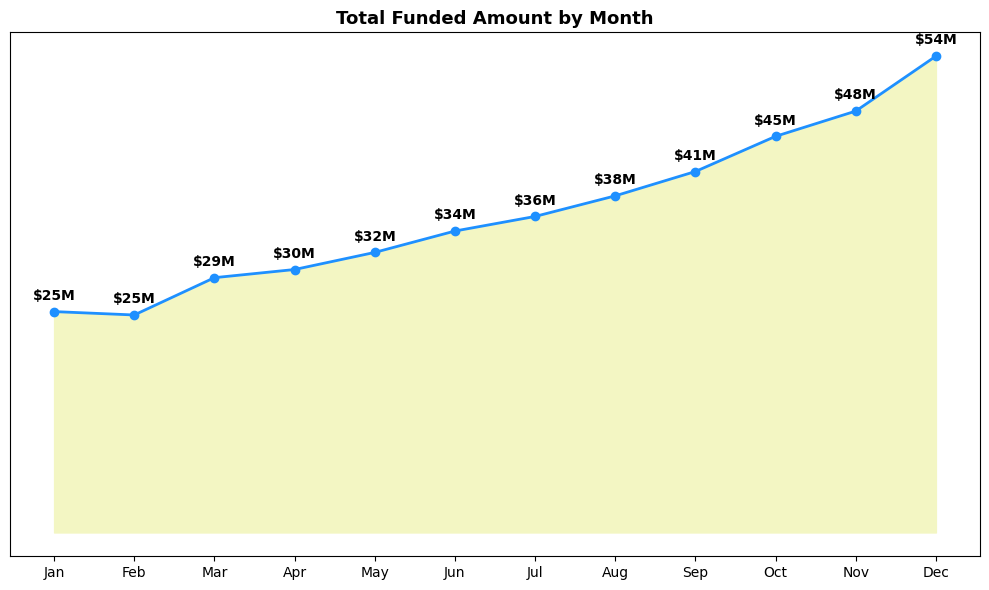

In [67]:
import matplotlib.pyplot as plt


monthly_funds = df.groupby('MonthName')['loan_amount'].sum().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

monthly_millions = monthly_funds / 1e6


plt.figure(figsize=(10, 6))
plt.fill_between(monthly_millions.index, monthly_millions.values, color='#F3F6C3')  # soft yellow like Power BI
plt.plot(monthly_millions.index, monthly_millions.values, marker='o', color='dodgerblue', linewidth=2)


for i, value in enumerate(monthly_millions.values):
    plt.text(i, value + 1, f"${value:.0f}M", ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.title('Total Funded Amount by Month', fontsize=13, fontweight='bold')


plt.yticks([])  
plt.ylabel('') 


plt.xticks(fontsize=10)
plt.grid(False)

plt.tight_layout()
plt.show()

 

#### 4. Total Loan Applications by State

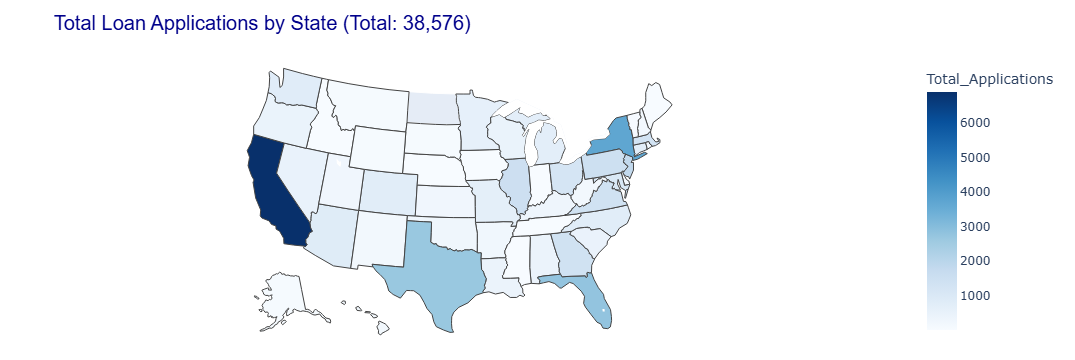

In [68]:
import plotly.express as px


state_counts = df.groupby('address_state')['id'].count().reset_index()
state_counts.columns = ['address_state', 'Total_Applications']


total_apps = state_counts['Total_Applications'].sum()


fig = px.choropleth(
    state_counts,
    locations='address_state',
    locationmode='USA-states',
    color='Total_Applications',
    scope='usa',
    title=f'Total Loan Applications by State (Total: {total_apps:,})',
    color_continuous_scale='Blues'
)

fig.update_layout(
    title_font=dict(size=20, family='Arial', color='darkblue'),
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    margin=dict(l=20, r=20, t=60, b=20)
)

fig.show()


#### Purpose For Loan

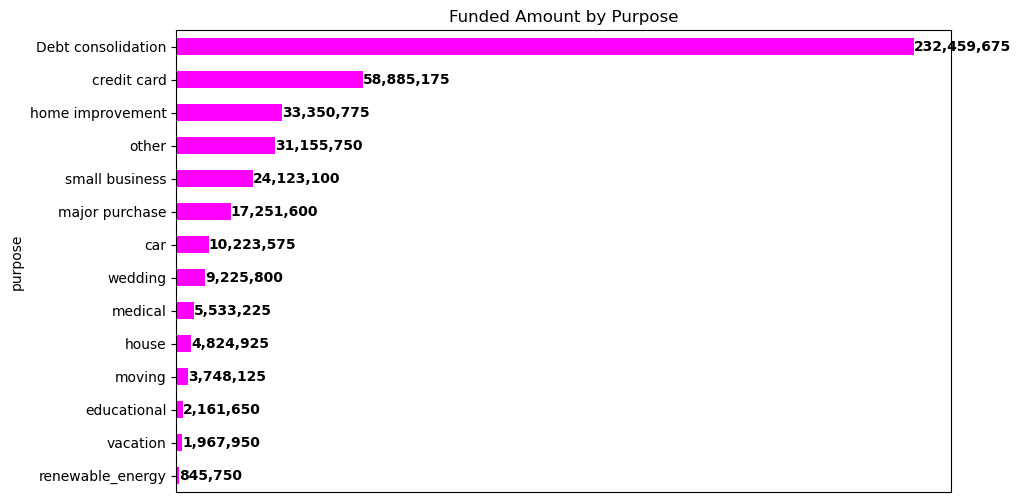

In [44]:

purpose = df.groupby('purpose')['loan_amount'].sum().sort_values()


ax = purpose.plot(kind='barh', color='magenta', figsize=(10, 6))
plt.title('Funded Amount by Purpose')


ax.xaxis.set_visible(False)

#data labels
for i, v in enumerate(purpose):
    ax.text(v, i, f'{v:,.0f}', va='center', color='black', fontweight='bold')



 #### Employee Length

In [69]:
employee_summary = df.groupby('emp_length').agg(
    Total_Loan_Applications=('id', 'count'),
    Total_Funded_Amount=('loan_amount', 'sum'),
    Total_Amount_Received=('total_payment', 'sum')
).reset_index().sort_values(by='emp_length')

print(" Employee Length Summary:\n", employee_summary)


 Employee Length Summary:
    emp_length  Total_Loan_Applications  Total_Funded_Amount  \
0      1 year                     3229             32883125   
1   10+ years                     8870            116115950   
2     2 years                     4382             44967975   
3     3 years                     4088             43937850   
4     4 years                     3428             37600375   
5     5 years                     3273             36973625   
6     6 years                     2228             25612650   
7     7 years                     1772             20811725   
8     8 years                     1476             17558950   
9     9 years                     1255             15084225   
10   < 1 year                     4575             44210625   

    Total_Amount_Received  
0                35498378  
1               125871646  
2                49206991  
3                47551832  
4                40964940  
5                40397574  
6                279

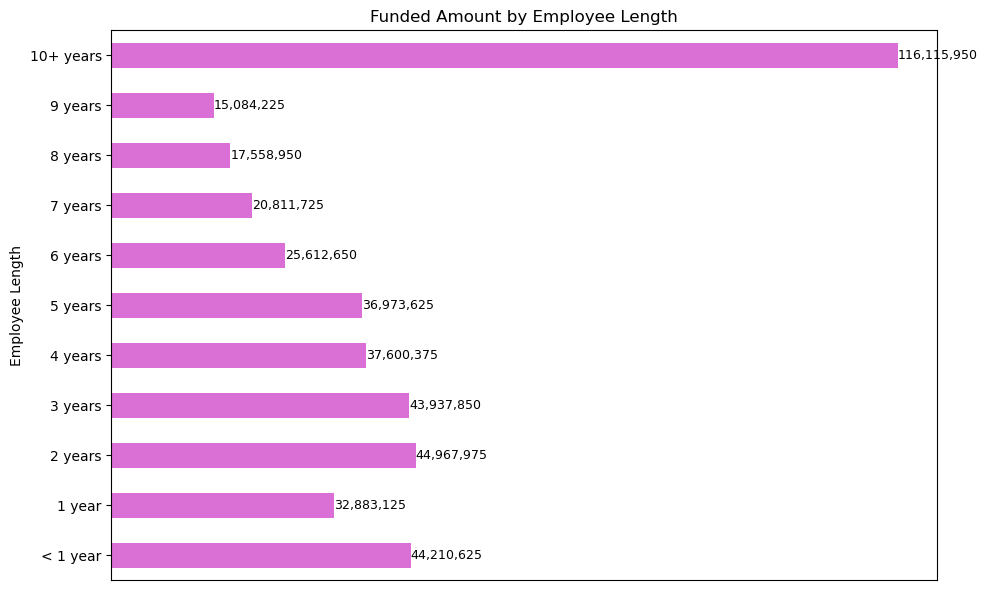

In [52]:

emp_order = [
    '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
    '6 years', '7 years', '8 years', '9 years', '10+ years'
]


employee_summary = df.groupby('emp_length')['loan_amount'].sum().reindex(emp_order)


ax = employee_summary.plot(kind='barh', color='orchid', figsize=(10, 6), title='Funded Amount by Employee Length')


for i, v in enumerate(employee_summary):
    if pd.notna(v):
        ax.text(v, i, f'{v:,.0f}', va='center', ha='left', fontsize=9)

ax.xaxis.set_visible(False)
plt.xlabel('Funded Amount')
plt.ylabel('Employee Length')
plt.tight_layout()
plt.show()


#### Home Ownership

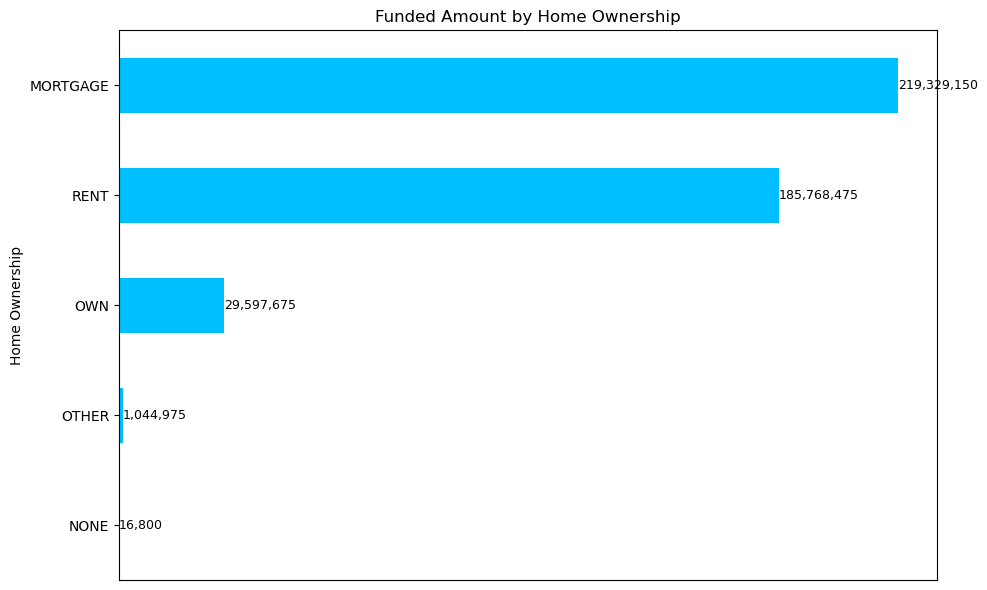

In [57]:
home_ownership_summary = df.groupby('home_ownership')['loan_amount'].sum().sort_values()


ax = home_ownership_summary.plot(kind='barh', color='deepskyblue', figsize=(10, 6), title='Funded Amount by Home Ownership')


for i, v in enumerate(home_ownership_summary):
    ax.text(v, i, f'{v:,.0f}', va='center', ha='left', fontsize=9)



ax.xaxis.set_visible(False)
plt.xlabel('Funded Amount')
plt.ylabel('Home Ownership')
plt.tight_layout()
plt.show()


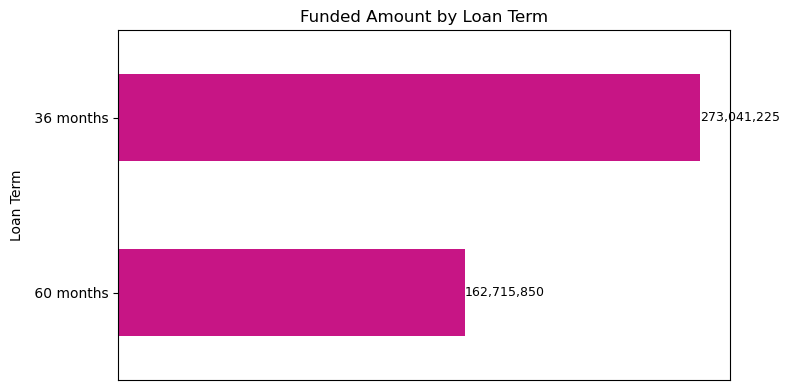

In [59]:
term_summary = df.groupby('term')['loan_amount'].sum().sort_values()
import matplotlib.pyplot as plt


ax = term_summary.plot(kind='barh', color='mediumvioletred', figsize=(8, 4), title='Funded Amount by Loan Term')


for i, v in enumerate(term_summary):
    ax.text(v, i, f'{v:,.0f}', va='center', ha='left', fontsize=9)


ax.xaxis.set_visible(False)
plt.xlabel('Funded Amount')
plt.ylabel('Loan Term')
plt.tight_layout()
plt.show()


#### Purpose With Grade

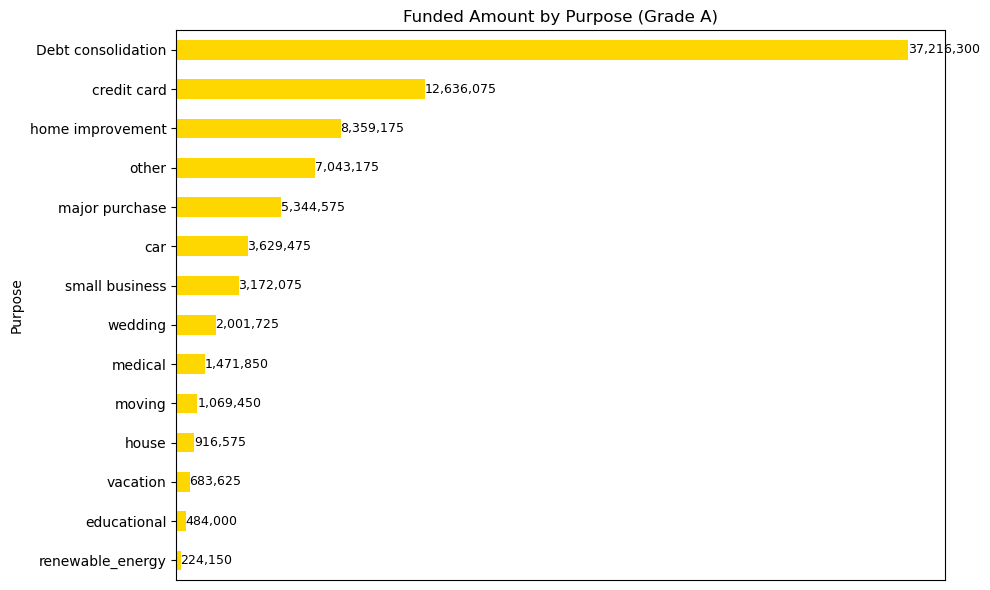

In [65]:
grade_a_purpose = df[df['grade'] == 'A'].groupby('purpose')['loan_amount'].sum().sort_values()
import matplotlib.pyplot as plt


ax = grade_a_purpose.plot(kind='barh', color='gold', figsize=(10, 6), title='Funded Amount by Purpose (Grade A)')


for i, v in enumerate(grade_a_purpose):
    ax.text(v, i, f'{v:,.0f}', va='center', ha='left', fontsize=9)

ax.xaxis.set_visible(False)
plt.xlabel('Funded Amount')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show()
